## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing test and train data

In [2]:
train_df = pd.read_excel(r"C:\Users\HP\Desktop\deep ler\machine learning\Flight price EDA And FE\data\Data_Train.xlsx")
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_df = pd.read_excel(r"C:\Users\HP\Desktop\deep ler\machine learning\Flight price EDA And FE\data\Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
df = train_df.append(test_df)
df.shape

C:\Users\HP\AppData\Local\Temp\ipykernel_6696\25355994.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train_df.append(test_df)


(13354, 11)

In [5]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

 So we have columns as 'Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route','Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops','Additional_Info', 'Price'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


## Feature Engineering process

### Spliting the date of journey

In [8]:
df['Date_Journey'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month_Journey'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year_Journey'] = df['Date_of_Journey'].str.split('/').str[2]

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


### Converting them into integer

In [10]:
df['Date_Journey'] = df['Date_Journey'].astype(int)
df['Month_Journey'] = df['Month_Journey'].astype(int)
df['Year_Journey'] = df['Year_Journey'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date_Journey     13354 non-null  int32  
 12  Month_Journey    13354 non-null  int32  
 13  Year_Journey     13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


### Dropping the Date_of_journey column

In [12]:
df.drop(columns = 'Date_of_Journey',axis = 1, inplace = True )

In [13]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019


### Now we will do the same by spliting the Dep_Time column and transforming them into integers

In [14]:
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_Min'] = df['Dep_Time'].str.split(':').str[1]
df['Dep_Hour'] = df['Dep_Hour'].astype(int)
df['Dep_Min'] = df['Dep_Min'].astype(int)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50


In [15]:
df.drop('Dep_Time',axis=1, inplace = True)

In [16]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Arrival_Time     13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date_Journey     13354 non-null  int32  
 10  Month_Journey    13354 non-null  int32  
 11  Year_Journey     13354 non-null  int32  
 12  Dep_Hour         13354 non-null  int32  
 13  Dep_Min          13354 non-null  int32  
dtypes: float64(1), int32(5), object(8)
memory usage: 1.3+ MB


### Now we will calculate the duration in minutes:

##### These two rows are misinformation which is caught on the execution of next code , so we drop these two rows

In [18]:
df[df['Duration'].str.split(' ').str[0]=='5m']

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Dep_Hour,Dep_Min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:55,5m,2 stops,No info,17327.0,6,3,2019,16,50
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:55,5m,2 stops,No info,NaN,12,3,2019,16,50


In [19]:
df.drop(6474,axis = 0,inplace=True)
df.drop(2660,axis = 0,inplace=True)

### Now we do the calculation

In [20]:
df['Duration_hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_hour'] = df['Duration_hour'].astype(int)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Dep_Hour,Dep_Min,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,9,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,4


In [21]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Dep_Hour,Dep_Min,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,9,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,4


In [22]:
df['Duration_min'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Dep_Hour,Dep_Min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,9,25,19,NaN


##### Filling up the blank space in the Minutes with 0 (eg . basically 19h = 19h 0m)

In [23]:
df['Duration_min'] = df['Duration_min'].fillna(0)

In [24]:
df['Duration_min'].isnull().sum()

0

In [25]:
df['Duration_min'] = df['Duration_min'].astype(int)
df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Dep_Hour,Dep_Min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,9,25,19,0


In [26]:
df['Total_Duration'] = df['Duration_hour']*60 + df['Duration_min']
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Dep_Hour,Dep_Min,Duration_hour,Duration_min,Total_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,4,45,285


In [27]:
df.drop(columns = ['Duration_hour','Duration_min','Duration'],axis = 1, inplace = True)

In [28]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Dep_Hour,Dep_Min,Total_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897.0,24,3,2019,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662.0,1,5,2019,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882.0,9,6,2019,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218.0,12,5,2019,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302.0,1,3,2019,16,50,285


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Route            13350 non-null  object 
 4   Arrival_Time     13351 non-null  object 
 5   Total_Stops      13350 non-null  object 
 6   Additional_Info  13351 non-null  object 
 7   Price            10681 non-null  float64
 8   Date_Journey     13351 non-null  int32  
 9   Month_Journey    13351 non-null  int32  
 10  Year_Journey     13351 non-null  int32  
 11  Dep_Hour         13351 non-null  int32  
 12  Dep_Min          13351 non-null  int32  
 13  Total_Duration   13351 non-null  int32  
dtypes: float64(1), int32(6), object(7)
memory usage: 1.2+ MB


### Now we will use the Arrival_Time column to split into Arrival_hour and Arrival_Min

In [30]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_Min'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df['Arrival_Min'] = df['Arrival_Min'].astype(int)
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Dep_Hour,Dep_Min,Total_Duration,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897.0,24,3,2019,22,20,170,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662.0,1,5,2019,5,50,445,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882.0,9,6,2019,9,25,1140,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218.0,12,5,2019,18,5,325,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302.0,1,3,2019,16,50,285,21,35


In [31]:
df.drop(columns = ['Arrival_Time'],axis = 1, inplace = True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Route            13350 non-null  object 
 4   Total_Stops      13350 non-null  object 
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date_Journey     13351 non-null  int32  
 8   Month_Journey    13351 non-null  int32  
 9   Year_Journey     13351 non-null  int32  
 10  Dep_Hour         13351 non-null  int32  
 11  Dep_Min          13351 non-null  int32  
 12  Total_Duration   13351 non-null  int32  
 13  Arrival_Hour     13351 non-null  int32  
 14  Arrival_Min      13351 non-null  int32  
dtypes: float64(1), int32(8), object(6)
memory usage: 1.2+ MB


### We will transform the number of stops into integer values

In [33]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [34]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop' : 0, '2 stops': 2, '1 stop' : 1, '3 stops' : 3, '4 stops' : 4})

In [35]:
df['Total_Stops'].isnull().sum()

1

In [36]:
df[df['Total_Stops'].isnull()==True]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Dep_Hour,Dep_Min,Total_Duration,Arrival_Hour,Arrival_Min
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7480.0,6,5,2019,9,45,1420,9,25


In [37]:
df.drop(9039,axis = 0, inplace = True)

In [38]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 0
Total_Stops           0
Additional_Info       0
Price              2670
Date_Journey          0
Month_Journey         0
Year_Journey          0
Dep_Hour              0
Dep_Min               0
Total_Duration        0
Arrival_Hour          0
Arrival_Min           0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  object 
 1   Source           13350 non-null  object 
 2   Destination      13350 non-null  object 
 3   Route            13350 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13350 non-null  object 
 6   Price            10680 non-null  float64
 7   Date_Journey     13350 non-null  int32  
 8   Month_Journey    13350 non-null  int32  
 9   Year_Journey     13350 non-null  int32  
 10  Dep_Hour         13350 non-null  int32  
 11  Dep_Min          13350 non-null  int32  
 12  Total_Duration   13350 non-null  int32  
 13  Arrival_Hour     13350 non-null  int32  
 14  Arrival_Min      13350 non-null  int32  
dtypes: float64(2), int32(8), object(5)
memory usage: 1.2+ MB


In [40]:
df.drop(columns = ['Route'],axis = 1, inplace = True)

In [41]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Dep_Hour,Dep_Min,Total_Duration,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,22,20,170,1,10
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,5,50,445,13,15
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,9,25,1140,4,25
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,18,5,325,23,30
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,16,50,285,21,35


In [42]:
df.describe()

,Total_Stops,Price,Date_Journey,Month_Journey,Year_Journey,Dep_Hour,Dep_Min,Total_Duration,Arrival_Hour,Arrival_Min
count,13350.000000,10680.000000,13350.000000,13350.000000,13350.0,13350.000000,13350.000000,13350.000000,13350.000000,13350.000000
mean,0.825768,9086.049345,13.391161,4.710712,2019.0,12.513258,24.501124,642.386891,13.396105,24.658801
std,0.674478,4611.111643,8.439823,1.165552,0.0,5.736812,18.831566,506.615544,6.896989,16.557798
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,75.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,175.000000,8.000000,10.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,520.000000,14.000000,25.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,930.000000,19.000000,35.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,2860.000000,23.000000,55.000000


### Insight 
* The maximum price of a flight is - 79512 and minmum price is - 1759 with the average price - 9086.049345
* The maximum duration of a flight is - 2860 mins  and minmum is - 75 mins with the average duration - 642.386891 mins

# Visualisation

In [43]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Dep_Hour,Dep_Min,Total_Duration,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,22,20,170,1,10
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,5,50,445,13,15


<AxesSubplot:xlabel='Price', ylabel='Count'>

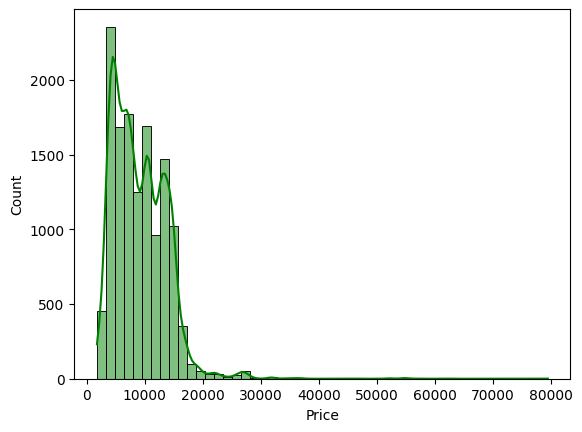

In [44]:
sns.histplot(data = df , x = 'Price',kde = True, color = 'g',bins = 50)

In [45]:
df['Airline'].value_counts()

Jet Airways                          4745
IndiGo                               2564
Air India                            2189
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Count'>

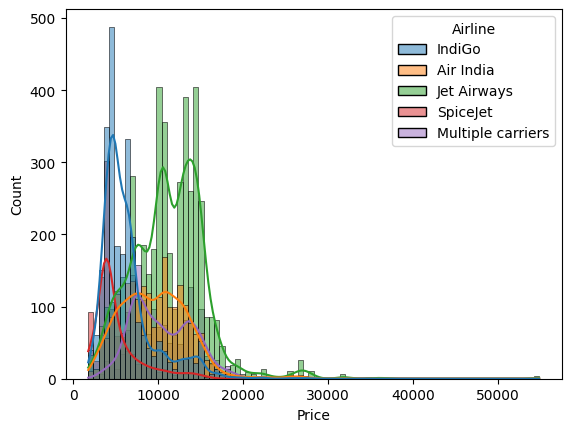

In [46]:
sns.histplot(data = df[df['Airline'].isin(df['Airline'].value_counts()[:5].index)] , x = 'Price',kde = True, hue = 'Airline')

## Insights
* Jet Airways has high price for there tickets
* IndiGo has a lower range of price for there tickets

In [47]:
df['Source'].value_counts()

Delhi       5680
Kolkata     3581
Banglore    2752
Mumbai       881
Chennai      456
Name: Source, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Count'>

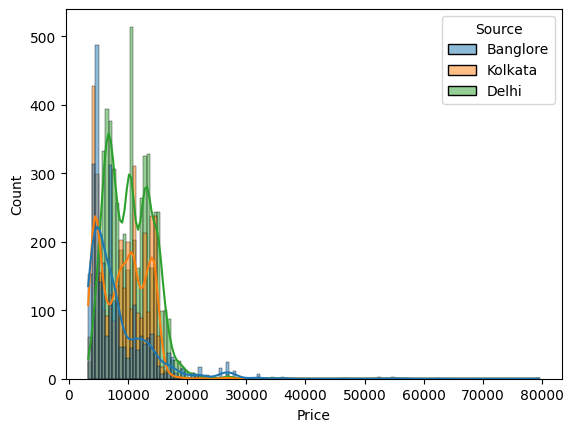

In [48]:
sns.histplot(data = df[df['Source'].isin(df['Source'].value_counts()[:3].index)] , x = 'Price',kde = True, hue = 'Source')

## Insights
* Source - Delhi flights are more expensive
* Source - Banglore flights are less expensive
* Source - Kolkata flights are moderate

In [49]:
df['Destination'].value_counts()

Cochin       5680
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     881
Kolkata       456
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Count'>

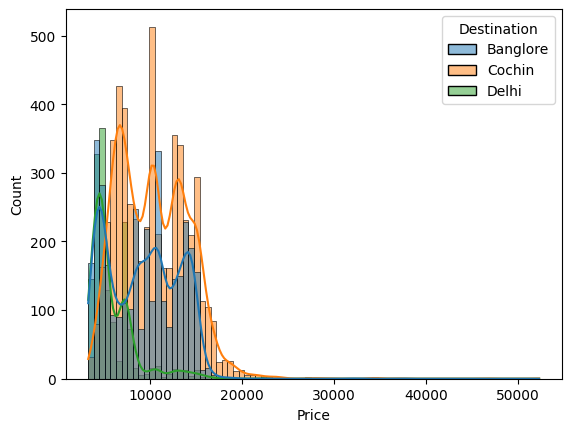

In [50]:
sns.histplot(data = df[df['Destination'].isin(df['Destination'].value_counts().index[:3])] , x = 'Price',kde = True, hue = 'Destination')

## Insights
* Destination - Cochin flights have a large no. of range and also many have used it
* Destination - Delhi most of the passenger uses for less price

<AxesSubplot:xlabel='Price', ylabel='Count'>

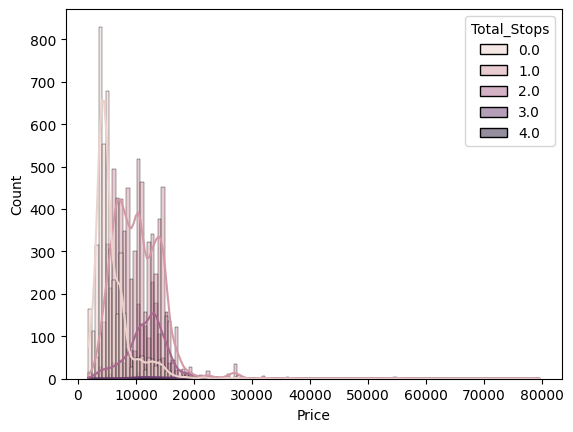

In [51]:
sns.histplot(data = df, x = 'Price', hue = 'Total_Stops', kde = True)

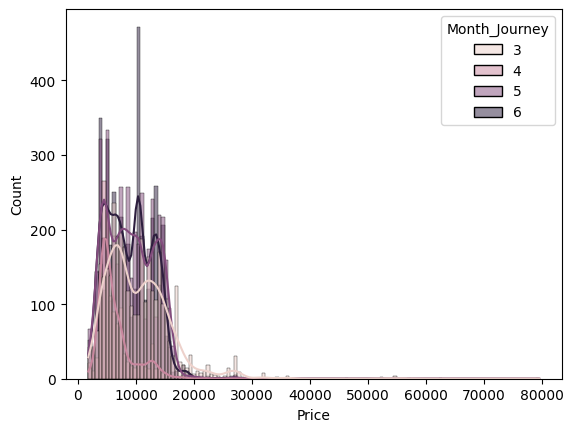

In [52]:
sns.histplot(data = df, x = 'Price', kde = True, hue = 'Month_Journey')
plt.show()

<AxesSubplot:xlabel='Airline', ylabel='count'>

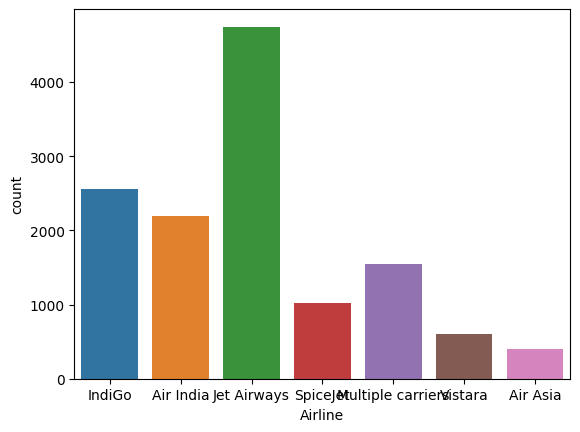

In [53]:
sns.countplot(data = df[df['Airline'].isin(df['Airline'].value_counts()[:7].index)] , x = 'Airline')

([<matplotlib.patches.Wedge at 0x1984022e790>,
 [Text(0.3654113323310639, 1.0481290751639498, 'Jet Airways'),
  Text(-1.1999931268568778, 0.004061464791584716, 'IndiGo'),
  Text(-0.3998182435309859, -1.142035626475723, 'Air India'),
  Text(0.7181948141418557, -0.9750472854891427, 'Multiple carriers'),
  Text(1.1681500970049075, -0.3196694556372652, 'SpiceJet')],
 [Text(0.2008116330828369, 0.5759988611261345, '39.32%'),
  Text(-0.6999959906665121, 0.002369187795091084, '21.25%'),
  Text(-0.23460409331157023, -0.670120078345259, '18.14%'),
  Text(0.42166516338138677, -0.5724678942880101, '12.79%'),
  Text(0.6858818710099824, -0.18769461638482307, '8.50%')])

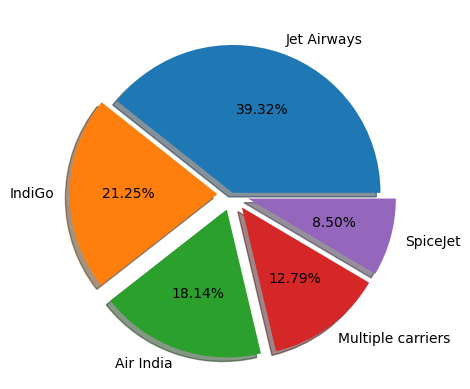

In [54]:
plt.pie(x = df['Airline'].value_counts()[:5], labels = df['Airline'].value_counts().index[:5], autopct = '%1.2f%%', shadow = True,explode=[0.01,0.1,0.11,0.111,0.1111])

In [55]:
df['Additional_Info'].value_counts()

No info                         10489
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Count'>

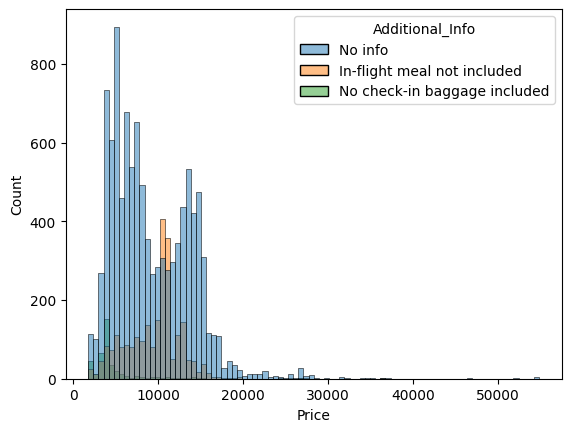

In [56]:
sns.histplot(data = df[df['Additional_Info'].isin(df['Additional_Info'].value_counts().index[:3])], x = 'Price',  hue = 'Additional_Info')

In [57]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [58]:

df['Airline']=labelencoder.fit_transform(df['Airline'])
df['Source']=labelencoder.fit_transform(df['Source'])
df['Destination']=labelencoder.fit_transform(df['Destination'])
df['Additional_Info']=labelencoder.fit_transform(df['Additional_Info'])

In [59]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Dep_Hour,Dep_Min,Total_Duration,Arrival_Hour,Arrival_Min
0,3,0,5,0.0,8,3897.0,24,3,2019,22,20,170,1,10
1,1,3,0,2.0,8,7662.0,1,5,2019,5,50,445,13,15
2,4,2,1,2.0,8,13882.0,9,6,2019,9,25,1140,4,25
3,3,3,0,1.0,8,6218.0,12,5,2019,18,5,325,23,30
4,3,0,5,1.0,8,13302.0,1,3,2019,16,50,285,21,35


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  int32  
 1   Source           13350 non-null  int32  
 2   Destination      13350 non-null  int32  
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13350 non-null  int32  
 5   Price            10680 non-null  float64
 6   Date_Journey     13350 non-null  int32  
 7   Month_Journey    13350 non-null  int32  
 8   Year_Journey     13350 non-null  int32  
 9   Dep_Hour         13350 non-null  int32  
 10  Dep_Min          13350 non-null  int32  
 11  Total_Duration   13350 non-null  int32  
 12  Arrival_Hour     13350 non-null  int32  
 13  Arrival_Min      13350 non-null  int32  
dtypes: float64(2), int32(12)
memory usage: 938.7 KB
